# **Facial Emotion Detection**

## **Problem Definition**

**The context:** Why is this problem important to solve?<br> Recognising facial emotions is important to understand human behaviour, to ease human-computer interaction, in healthcare especially mental health conditions, security and surveillance to detect abnormal behaviour, in education for assessing student behaviour and enhance learning outcomes. It can also be used in market research and advertising to understand customer experience. Due to these widespread business implications, this is an important problem to solve

**The objectives:** What is the intended goal?<br>
Here, we are trying to teach a machine to be able to predict human emotions, exactly how a human does it,ie, just by looking at the face. So, our goal is to develop a model, by trial and error, with a satisfactory level of accuracy that can predict the emotion reflected in an image of a person's face.

**The key questions:** What are the key questions that need to be answered?<br>
-How do humans distinguish between various facial emotions?

-How can one emotion be differentiated from the other?

-How to tweak a model in such a way that it can improve its performance to predict an emotion?

-What hyper parameters need to be adjusted?

-How deep should the model be to maximise accuracy and minimise computation time?

-What confusions arise?

-How to improve model performance to dissolve these confusions?

-What is the better approach-Transfer learning or designing from scratch?

**The problem formulation:** What are we trying to solve using data science?
We have a database of facial images.These images need to be analysed,sorted out and augmented to be used as input for a convolutional neural network model to train it to identify emotions on new unseen data;the validation and test data sets. The performance is measured using accuracy and f1 score. The final results are plot on a confusion matrix.



## **About the dataset**

The data set consists of 3 folders, i.e., 'test', 'train', and 'validation'.
Each of these folders has four subfolders:

**‘happy’**: Images of people who have happy facial expressions.<br>
**‘sad’**: Images of people with sad or upset facial expressions.<br>
**‘surprise’**: Images of people who have shocked or surprised facial expressions.<br>
**‘neutral’**: Images of people showing no prominent emotion in their facial expression at all.<br>


## **Mounting the Drive**

**NOTE:**  Please use Google Colab from your browser for this notebook. **Google.colab is NOT a library that can be downloaded locally on your device.**

In [1]:
#mounting drive on google colab
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


## **Importing the Libraries**

In [2]:
#importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import zipfile
import seaborn as sns

#For images
import cv2


#For ModelBuilding
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Activation,LeakyReLU,Dropout
from tensorflow.keras import backend,losses,optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.preprocessing.image import load_img,ImageDataGenerator
from tensorflow.keras.regularizers import l2
from google.colab.patches import cv2_imshow

#For evaluating performance
from sklearn.metrics import classification_report,confusion_matrix,f1_score,accuracy_score




### **Let us load and unzip the data**

**Note:**
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [3]:
#unzipping folder
with zipfile.ZipFile('/content/drive/MyDrive/Capstone Project/Facial_emotion_images.zip','r') as zipref:
  zipref.extractall()

## **Visualizing our Classes**

Let's look at our classes.

**Write down your observation for each class. What do you think can be a unique feature of each emotion, that separates it from the remaining classes?**

### **Happy**

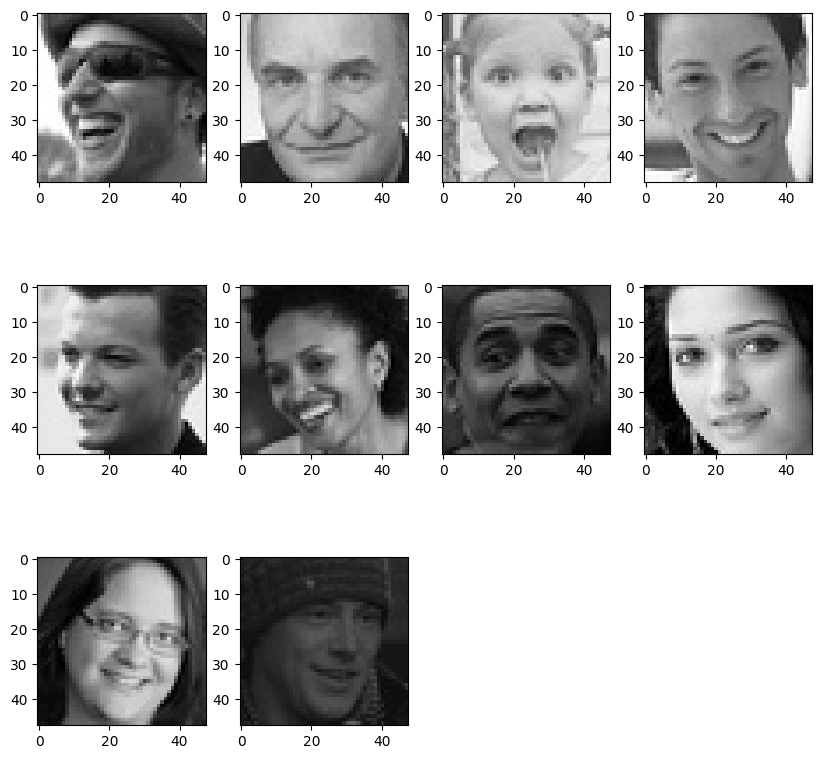

In [4]:
#visualising first 10 images in folder "happy"
path='Facial_emotion_images/'           #saving the path of the images extracted from the zipped folder
expression1='happy'

fig=plt.figure(figsize=(10,10))         #plotting the images
for i in range(1,11):                   #creating a loop to show the first 10 images in the folder
  ax=fig.add_subplot(3,4,i)
  img=load_img(path+'train/'+expression1+'/'+os.listdir(path+'train/'+expression1)[i],target_size=(48,48))   #loading image into img
  plt.imshow(img)


**Observations and Insights : These are gray scale images of happy faces clicked from many different angles. The common factor is that the lips are curved and there are lines on the cheek muscles. The teeth may or may not be showed**

### **Neutral**

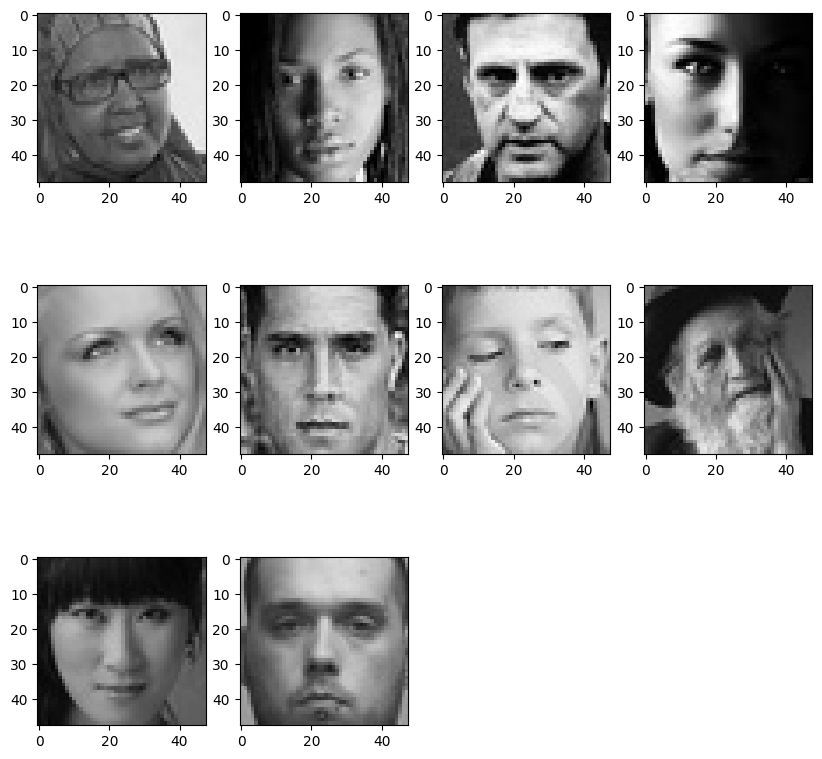

In [5]:
#visualising first 10 images in folder "Neutral"
expression2='neutral'

fig=plt.figure(figsize=(10,10))

for i in range(1,11):
  ax=fig.add_subplot(3,4,i)
  img=load_img(path+'train/'+expression2+'/'+os.listdir(path+'train/'+expression2)[i],target_size=(48,48))
  plt.imshow(img)

**Observations and Insights:Gray scale images of faces showning no prominent emotion. No specific feature to learn from.**

### **Sad**

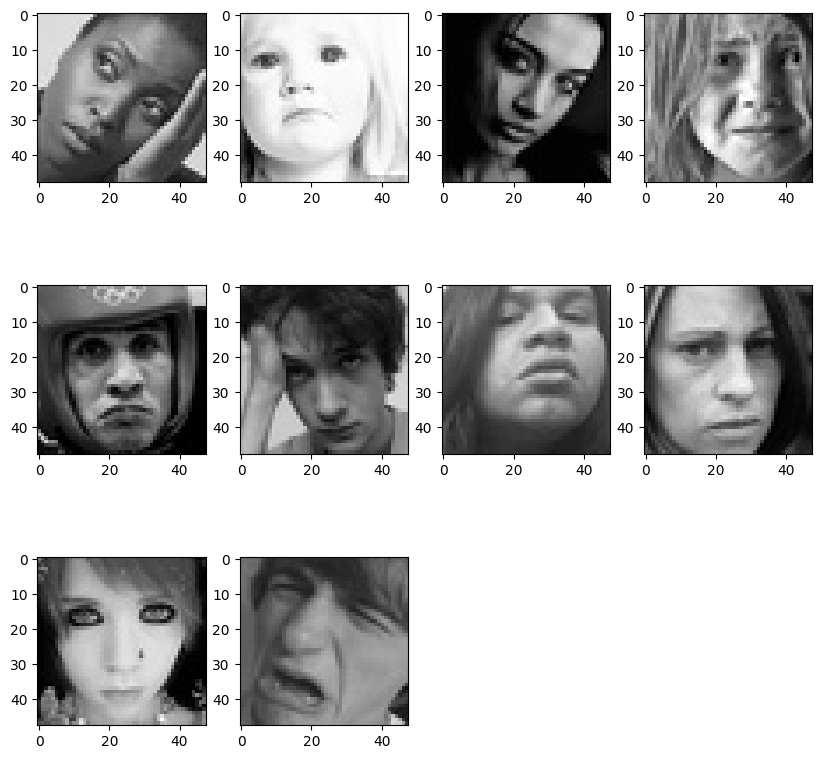

In [6]:
#visualising first 10 images in folder "sad"
expression3='sad'

fig=plt.figure(figsize=(10,10))

for i in range(1,11):
  ax=fig.add_subplot(3,4,i)
  img=load_img(path+'train/'+expression3+'/'+os.listdir(path+'train/'+expression3)[i],target_size=(48,48))
  plt.imshow(img)

**Observations and Insights: Sad or angry images with most faces having lips tightened or curved downward. For the others, its hard to differentiate with neutral**

### **Surprised**

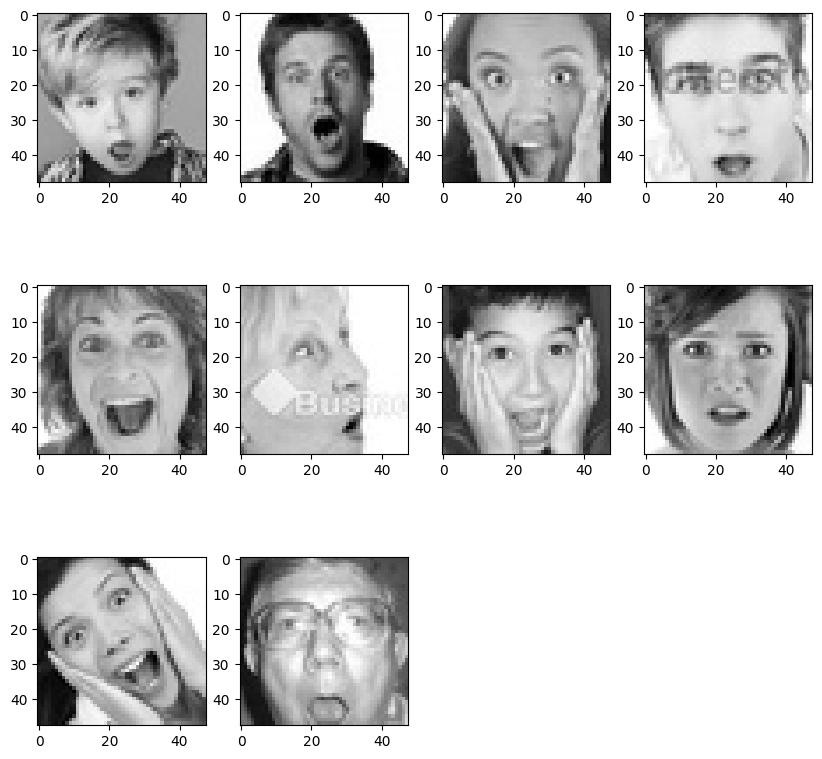

In [7]:
#visualising first 10 images in folder "surprise"
expression4='surprise'

fig=plt.figure(figsize=(10,10))

for i in range(1,11):
  ax=fig.add_subplot(3,4,i)
  img=load_img(path+'train/'+expression4+'/'+os.listdir(path+'train/'+expression4)[i],target_size=(48,48))
  plt.imshow(img)

**Observations and Insights:Easily predictable with eyes rolled, mouths open,eyebrows raised**

## **Checking Distribution of Classes**

Text(0, 0.5, 'Count')

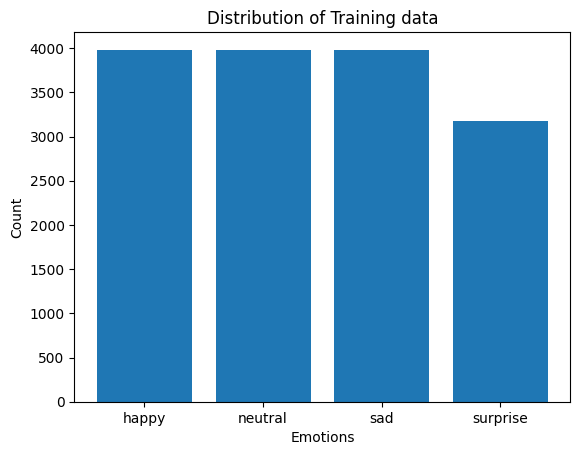

In [8]:
#accessing the respective 'train' folder to count the number of images in each expression
train_count_happy=len(os.listdir(path+'train'+'/'+expression1))
train_count_neutral=len(os.listdir(path+'train'+'/'+expression2))
train_count_sad=len(os.listdir(path+'train'+'/'+expression3))
train_count_surprise=len(os.listdir(path+'train'+'/'+expression4))

emotions=['happy',"neutral","sad","surprise"]  #creating an array of emotions
train_count=[train_count_happy,train_count_neutral,train_count_sad,train_count_surprise] #creating an array of emotions

#plotting the two on a bar chart
plt.bar(emotions,train_count)
plt.title("Distribution of Training data")
plt.xlabel('Emotions')
plt.ylabel('Count')

**Observations and Insights:Though it looks there are fewer images in the 'Surprise' class, it does'nt look like it would affect the training process as after visualisation, it looked like the 'Surprise' images are easily predictable**

**Think About It:**
* Are the classes equally distributed? If not, do you think the imbalance is too high? Will it be a problem as we progress?
There is a slight imbalance in "Surprise". Though it would not affect the training process as it looked fairly easy to predict. If it does become a problem then we could try increasing the class weight
* Are there any Exploratory Data Analysis tasks that we can do here? Would they provide any meaningful insights?
As we are dealing with image data we could do some augmentation: Rescaling, shearing and horizontal flip

## **Creating our Data Loaders**

In this section, we are creating data loaders that we will use as inputs to our Neural Network.

**You have two options for the color_mode. You can set it to color_mode = 'rgb' or color_mode = 'grayscale'. You will need to try out both and see for yourself which one gives better performance.**

In [9]:
#Creating an Image Data Generator object with rescaling, shearing and horizontal flip features
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.3,
    horizontal_flip=True,
   )
#using the Image Data Generator object to save the train images in grayscale to train_data
train_data=datagen.flow_from_directory(
    path+'train',
    color_mode='grayscale',
    target_size=(48,48),
    batch_size=32,shuffle=True)

#Creating empty train images and labels arrays to save the images and labels after iterating over train_data
train_images = []
train_labels = []

# Iterate over train_data to access images and labels separately if required in future
for i in range(len(train_data)):
    batch_images, batch_labels = next(train_data)
    train_images.extend(batch_images)
    train_labels.extend(batch_labels)




Found 15109 images belonging to 4 classes.


In [10]:
#using the Image Data Generator object to save the train images in rgb to train_data_rgb to create a model to be trained with rgb later
train_data_rgb=datagen.flow_from_directory(
    path+'train',
    color_mode='rgb',
    target_size=(48,48),
    batch_size=32,shuffle=True)

Found 15109 images belonging to 4 classes.


[0. 0. 0. 1.]


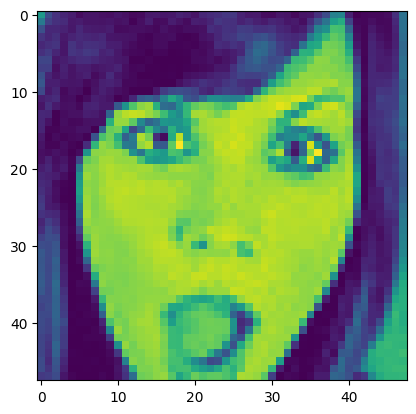

In [11]:
#CHECKING IF THE TRAIN DATA IS ACCURATE AFTER AUGMENTATION AND SHUFFLING
plt.imshow(train_images[25])
print(train_labels[25])

Training data should be accurate, as the above image matches the label

In [12]:

#using the Image Data Generator object to save the validation images in grayscale to validation__data
validation_data=datagen.flow_from_directory(
    path+'validation',
    color_mode='grayscale',
    target_size=(48,48),
    batch_size=32)



Found 4977 images belonging to 4 classes.


In [13]:
#using the Image Data Generator object to save the validation images in rgb to validation_data_rgb to create a model to be trained with rgb later
validation_data_rgb=datagen.flow_from_directory(
    path+'validation',
    color_mode='rgb',
    target_size=(48,48),
    batch_size=32)

Found 4977 images belonging to 4 classes.


In [14]:

#using the Image Data Generator object to save the test images in grayscale to test_data
test_data=datagen.flow_from_directory(
    path+'test',
    color_mode='grayscale',
    target_size=(48,48),
    batch_size=32)

#Creating empty test images and labels arrays to save the images and labels after iterating over test_data
test_images = []
test_labels = []

# Iterate over test_data to access images and labels separately
for i in range(len(test_data)):
    batch_images, batch_labels = next(test_data)
    test_images.extend(batch_images)
    test_labels.extend(batch_labels)

Found 128 images belonging to 4 classes.


In [15]:
#using the Image Data Generator object to save the test images in rgb to train_data_rgb to test a model to be trained with rgb later
test_data_rgb=datagen.flow_from_directory(
    path+'test',
    color_mode='rgb',
    target_size=(48,48),
    batch_size=32)

#Creating empty test images and labels arrays to save the images and labels after iterating over test_data_rgb
test_images_rgb = []
test_labels_rgb = []

# Iterate over the generator to access images and labels
for i in range(len(test_data_rgb)):
    batch_images, batch_labels = next(test_data_rgb)
    test_images_rgb.extend(batch_images)
    test_labels_rgb.extend(batch_labels)

Found 128 images belonging to 4 classes.


[0. 0. 1. 0.]


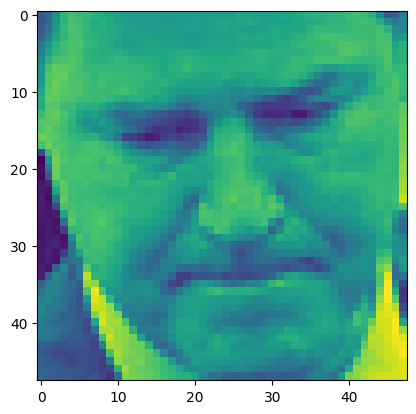

In [16]:
#CHECKING IF THE Test DATA IS ACCURATE AFTER AUGMENTATION
plt.imshow(test_images[100])
print(test_labels[100])

Test data should be accurate as the above image matches the image labels

## **Model Building**

**Think About It:**
* Are Convolutional Neural Networks the right approach? Should we have gone with Artificial Neural Networks instead?
We are dealing with Images here, we would need the convolutional layers to filter out important features. ANNs are typicallyused for non image data.
* What are the advantages of CNNs over ANNs and are they applicable here?

--CNNs allow selecting specific features in images making it the best choice for working with image inputs

--Parameters are shared accross various areas of input images reducing the number of trainable parameters

--This also helps in object detection images as small areas in images can be focussed on

--Maxpooling layers help max or average out dimensions of images so that the input image dimensions can be kept minimal

### **Creating the Base Neural Network**

In [17]:
model1=Sequential()

model1.add(Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(48,48,1)))#Adding first Convolutional layer with input shape 48,48,1 for grayscale images, 32 filters and kernal size=(3,3)
model1.add(MaxPooling2D(2,2))#MaxPooling to reduce size

model1.add(Conv2D(64,(3,3),padding='same',activation='relu'))#Adding second convolutional layer with 64 filters
model1.add(MaxPooling2D(2,2))

model1.add(Conv2D(64,(3,3),padding='same',activation='relu'))#Adding third convolutional layer with 64 filters
model1.add(Flatten())                         #Flatten input data to 1D array

model1.add(Dense(32,activation='relu'))#one dense layer in the fully connected NN with 32 nodes
model1.add(Dense(4,activation="Softmax"))#output layer with 4 nodes as there are 4 emotions to be classified into

model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 9216)              0

Total of 350820 parameters all trainable with most number of parameters for the fully connected layer

### **Compiling and Training the Model**

In [18]:
opt=Adam(learning_rate=0.001) #using Adam optimizer with learning rate 0.001
model1.compile(
    optimizer=opt,
    loss='categorical_crossentropy',  #as we are dealing with a multi class output with each sample belonging to exactly 1 class
    metrics='accuracy')        #compiling model using categorical crossentropy to improve accuracy


In [19]:
#Defining callbacks
es=EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    verbose=1,
    mode='auto')        #Stop training if validation accuracy does not improve for 5 consecutive epochs

mc=ModelCheckpoint(
    'best_model1',
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
    mode='auto',
    save_freq='epoch')  #Save model to best_model_1 when validation accuracy is the highest for a particular epoch

In [20]:
#Training model 1 on training data for 20 epochs to be validated with validation data using callbacks defined above and shuffling the training data after each epoch
history1=model1.fit(                    #trained model saved in history1
    train_data,
    epochs=20,
    validation_data=validation_data,
    callbacks=[es,mc],
    shuffle=True)

Epoch 1/20
473/473 [==============================] - ETA: 0s - loss: 1.2033 - accuracy: 0.4511
Epoch 1: val_accuracy improved from -inf to 0.55696, saving model to best_model1
473/473 [==============================] - 21s 34ms/step - loss: 1.2033 - accuracy: 0.4511 - val_loss: 1.0715 - val_accuracy: 0.5570
Epoch 2/20
472/473 [============================>.] - ETA: 0s - loss: 1.0274 - accuracy: 0.5638
Epoch 2: val_accuracy improved from 0.55696 to 0.62005, saving model to best_model1
473/473 [==============================] - 17s 36ms/step - loss: 1.0272 - accuracy: 0.5638 - val_loss: 0.9344 - val_accuracy: 0.6201
Epoch 3/20
473/473 [==============================] - ETA: 0s - loss: 0.9123 - accuracy: 0.6198
Epoch 3: val_accuracy improved from 0.62005 to 0.65441, saving model to best_model1
473/473 [==============================] - 15s 32ms/step - loss: 0.9123 - accuracy: 0.6198 - val_loss: 0.8667 - val_accuracy: 0.6544
Epoch 4/20
471/473 [============================>.] - ETA: 0s - 

Training stopped early as validation accuracy did not improve from 70.866% for 5 continuous epochs after 15 epochs


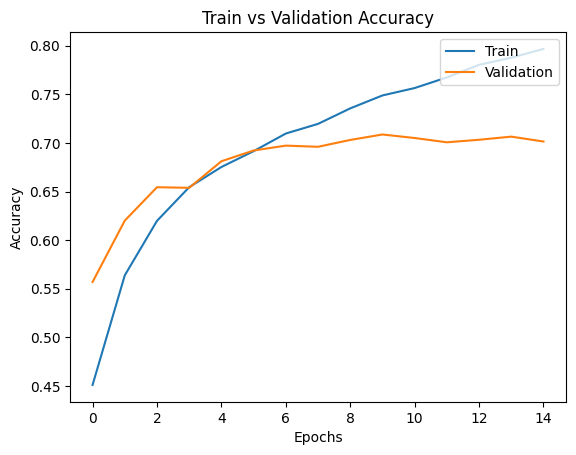

In [21]:
#plotting training accuracy versus validation accuracy of model history1
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Train vs Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'],loc='upper right')

The plot hints at overfiting as validation accuracy falls below training accuracy as epochs progress. Validation accuracy levels at around 70%. We might need to add more layers to ensure generalization for this model.

### **Evaluating the Model on the Test Set**

In [22]:
model1.evaluate(test_data)                          #Evaluating performance on test_data

4/4 [==============================] - 0s 20ms/step - loss: 0.7007 - accuracy: 0.7344


[0.7007224559783936, 0.734375]

Printing the Classification Report and Confusion Matrix:

4/4 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       0.77      0.75      0.76        32
           1       0.64      0.84      0.73        32
           2       0.68      0.53      0.60        32
           3       0.97      0.91      0.94        32

    accuracy                           0.76       128
   macro avg       0.77      0.76      0.76       128
weighted avg       0.77      0.76      0.76       128



Text(0.5, 25.722222222222214, 'Predicted')

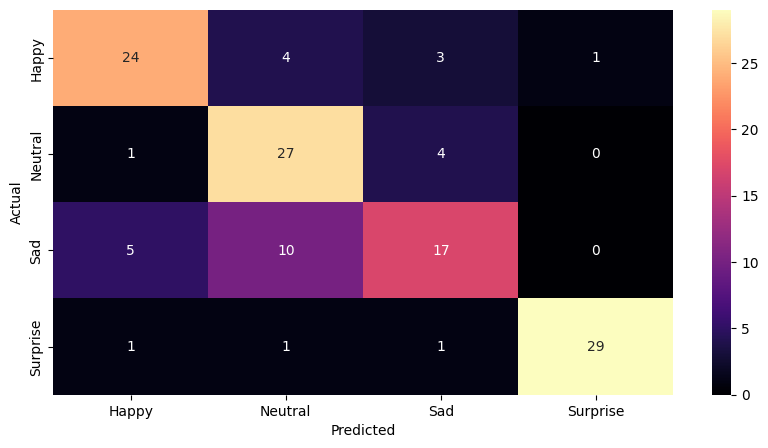

In [23]:
#Generating predicted and true values of labels
y_pred=model1.predict(np.array(test_images))           #Generating array of probabilities of predicted labels
y_pred=np.argmax(y_pred,axis=1)                        #Converting probabilities to classes by choosing the max value in each array
y_true=np.argmax(np.array(test_labels),axis=1)       #generating array of true values of test labels by converting probabilities to classes by choosing max value in each array

print(classification_report(y_true,y_pred))     #Printing classification report using true and predicted values of labels
f1_model1 = f1_score(y_true, y_pred, average='weighted')      #storing the f1 score of model1
accuracy_model1 = accuracy_score(y_true, y_pred)              #storing the accuracy of model1

cm=confusion_matrix(y_true,y_pred)
plt.figure(figsize=(10,5))
sns.heatmap(cm,annot=True,cmap='magma',xticklabels=['Happy','Neutral','Sad','Surprise'],yticklabels=['Happy','Neutral','Sad','Surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')

**Observations and Insights:Clearly, most of the confusion lies between neutral and sad. 'Sad' was predicted as 'Neutral' 10 times and 'Neutral' predicted as 'Sad' 4 times.F1 score for Sad and Neutral is lower as expected. Test Accuracy at 73.4%**

### **TRAINING THE SAME MODEL(MODEL1) ON RGB DATA**

CREATING THE SAME MODEL WITH INPUT SHAPE=(48,48,3) FOR RGB

In [24]:
#same model architecture as model1 except for the input shape to monitor difference in performance if any
model1_rgb=Sequential()

model1_rgb.add(Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(48,48,3)))     #input shape changed to (48,48,3) for rgb data
model1_rgb.add(MaxPooling2D(2,2))

model1_rgb.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model1_rgb.add(MaxPooling2D(2,2))

model1_rgb.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model1_rgb.add(Flatten())

model1_rgb.add(Dense(32,activation='relu'))
model1_rgb.add(Dense(4,activation="Softmax"))

model1_rgb.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 24, 24, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 flatten_1 (Flatten)         (None, 9216)             

351396 trainable parameters, slightly more than the grayscale model, difference only in the first Conv2d layer due to change in input shape

### **COMPILING AND TRAINING THE MODEL**

In [25]:
#Compiling the model using same parameters as model1
opt=Adam(learning_rate=0.001)
model1_rgb.compile(
    optimizer=opt,
    loss='categorical_crossentropy',
    metrics='accuracy')


In [26]:
#Defining callbacks again to save the best model
es1_rgb=EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    verbose=1,
    mode='auto')        #Stop training if validation accuracy does not improve for 5 consecutive epochs

mc1_rgb=ModelCheckpoint(
    'best_model1_rgb',
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
    mode='auto',
    save_freq='epoch')  #Save model to best_model_1_rgb when validation accuracy is the highest for a particular epoch

In [27]:
history1_rgb=model1_rgb.fit(         #Saving trained model to history1_rgb
    train_data_rgb,
    epochs=20,
    validation_data=validation_data_rgb,
    callbacks=[es1_rgb,mc1_rgb],
    shuffle=True)               #Training the model using train_data_rgb and validating on validation_data_rgb. All other parameters stay the same.

Epoch 1/20
473/473 [==============================] - ETA: 0s - loss: 1.1482 - accuracy: 0.4845
Epoch 1: val_accuracy improved from -inf to 0.60579, saving model to best_model1_rgb
473/473 [==============================] - 26s 50ms/step - loss: 1.1482 - accuracy: 0.4845 - val_loss: 0.9669 - val_accuracy: 0.6058
Epoch 2/20
473/473 [==============================] - ETA: 0s - loss: 0.9067 - accuracy: 0.6214
Epoch 2: val_accuracy improved from 0.60579 to 0.66184, saving model to best_model1_rgb
473/473 [==============================] - 25s 52ms/step - loss: 0.9067 - accuracy: 0.6214 - val_loss: 0.8360 - val_accuracy: 0.6618
Epoch 3/20
473/473 [==============================] - ETA: 0s - loss: 0.8146 - accuracy: 0.6587
Epoch 3: val_accuracy improved from 0.66184 to 0.68375, saving model to best_model1_rgb
473/473 [==============================] - 24s 51ms/step - loss: 0.8146 - accuracy: 0.6587 - val_loss: 0.7919 - val_accuracy: 0.6837
Epoch 4/20
472/473 [============================>.] 

Training stopped early as validation accuracy did not improve from 71.248% for 5 continuous epochs after 14 epochs

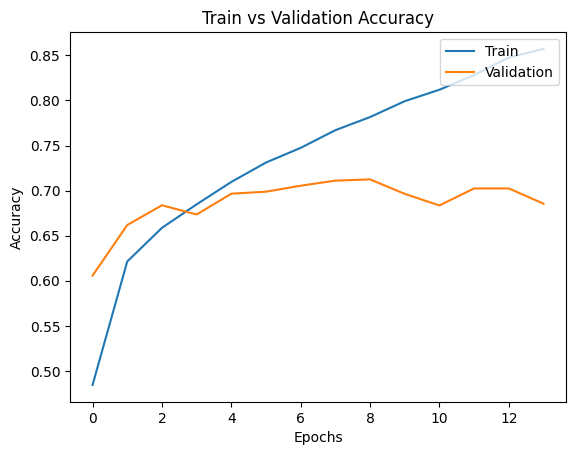

In [28]:
#plotting the training vs validation accuracy
plt.plot(history1_rgb.history['accuracy'])
plt.plot(history1_rgb.history['val_accuracy'])
plt.title('Train vs Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'],loc='upper right')

More or less the same performance when compared to the gray scale input. Signs of overfitting seen as validation accuracy levels at 71% when train accuracy increases gradually

### **Evaluating the Model on the Test Set**

In [29]:
model1_rgb.evaluate(np.array(test_images_rgb),np.array(test_labels_rgb))   #evaluating the model

4/4 [==============================] - 0s 4ms/step - loss: 0.9203 - accuracy: 0.6953


[0.9203113317489624, 0.6953125]

4/4 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.71      0.78      0.75        32
           1       0.57      0.72      0.64        32
           2       0.68      0.53      0.60        32
           3       0.86      0.75      0.80        32

    accuracy                           0.70       128
   macro avg       0.71      0.70      0.70       128
weighted avg       0.71      0.70      0.70       128



Text(0.5, 25.722222222222214, 'Predicted')

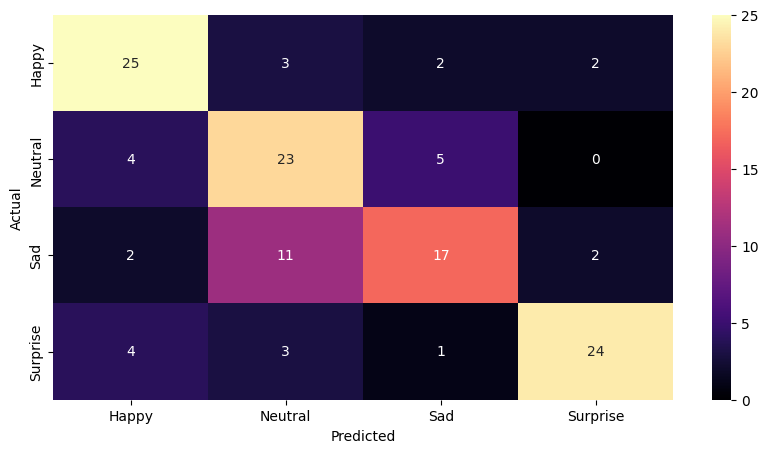

In [30]:
y_pred=model1_rgb.predict(np.array(test_images_rgb))                       #predicting values on rgb test images
y_pred=np.argmax(y_pred,axis=1)                                            #converting probabilities to labels
y_true=np.argmax(np.array(test_labels_rgb),axis=1)                         #extracting the true values

print(classification_report(y_true,y_pred))                                #printing classification report

f1_model1_rgb = f1_score(y_true, y_pred, average='weighted')      #storing the f1 score of model1_rgb
accuracy_model1_rgb = accuracy_score(y_true, y_pred)              #storing the accuracy of model1_rgb

cm=confusion_matrix(y_true,y_pred)                                         #plotting confusion matrix
plt.figure(figsize=(10,5))
sns.heatmap(cm,annot=True,cmap='magma',xticklabels=['Happy','Neutral','Sad','Surprise'],yticklabels=['Happy','Neutral','Sad','Surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')

The RGB model also shows the same confusion between 'Sad' and 'Neutral' emotions. Test Accuracy at 69.5%. Looks like RGB and grayscale data have more or less the same performance. RGB shows a slightly higher performance when considering val_accuracy, while grayscale test_accuracy is better. Considering the difference is the number of parameters(slightly higher for RGB) and no noticeable improvement in performance of the RGB model, I prefer the grayscale model over the RGB one. Also it must be noted that our input images are grayscale images

### **Creating the second Convolutional Neural Network**

- Try out a slightly larger architecture

Strategies:
-Choosing grayscale inputs as no noticeable increase in accuracy was seen for RGB

-Adding more Conv2D layers with more filters

-increasing kernel size to (4,4) to capture bigger facial features

-Added 1 each of drop out layer with a drop out rate of 20% and batch normalization to improve generalizability combatting overfitting

-class weights-Adding the class_weights parameter while training the model to ensure 'sad' and 'neutral' classes have more weights than others to correct the model's confusion

In [ ]:
model2=Sequential()

model2.add(Conv2D(32,(4,4),activation='relu',padding='same',input_shape=(48,48,1)))  #moving ahead with grayscale inputs as RGB didnt show much big of a difference

model2.add(Conv2D(64,(4,4),padding='same',activation='relu'))                        #removed maxpooling layers

model2.add(Conv2D(64,(4,4),padding='same',activation='relu'))                        #2 layers of conv2D with 64 filters and kernel size lowered to (4,4) to capture bigger details
model2.add(MaxPooling2D(2,2))

model2.add(Conv2D(128,(4,4),padding='same',activation='relu'))                       #2 layers of conv2D with 128 filters

model2.add(Conv2D(128,(4,4),padding='same',activation='relu'))
model2.add(MaxPooling2D(2,2))

model2.add(Conv2D(256,(4,4),padding='same',activation='relu'))                       #2 layers of conv2D with 256 filters

model2.add(Conv2D(256,(4,4),padding='same',activation='relu'))
model2.add(MaxPooling2D(2,2))                                          # 1 maxpooling layer

model2.add(Flatten())

model2.add(Dense(32,activation='relu'))
model2.add(Dropout(0.2))                                              #to correct the overfitting that may be caused
model2.add(BatchNormalization())

model2.add(Dense(32,activation='relu'))

model2.add(Dense(4,activation="Softmax"))

model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        544       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        32832     
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 64)        65600     
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 128)       131200    
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 128)       262272    
                                                        

More convolutional layers caused more parameters and 64 non trainable parameters

### **Compiling and Training the Model**

In [ ]:
#Compiling the model using same parameters
opt=Adam(learning_rate=0.001)
model2.compile(
    optimizer=opt,
    loss='categorical_crossentropy',
    metrics='accuracy')

In [ ]:
#Defining callbacks
es2=EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    verbose=1,
    mode='auto')        #Stop training if validation accuracy does not improve for 5 consecutive epochs

mc2=ModelCheckpoint(
    'best_model2',
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
    mode='auto',
    save_freq='epoch')  #Save model to best_model_2 when validation accuracy is the highest for a particular epoch

#Defining class weights
class_weights = {0: 1, 1: 2, 2: 2, 3: 1}      #Higher weights for 'Neutral' and 'Sad'

In [ ]:
history2=model2.fit(         #Saving trained model to history2
    train_data,
    epochs=20,
    validation_data=validation_data,
    class_weight=class_weights,
    callbacks=[es2,mc2],
    shuffle=True)               #Training data using train_data and validating on validation_data. Class weights parameter additional

Epoch 1/20
472/473 [============================>.] - ETA: 0s - loss: 2.0047 - accuracy: 0.2808
Epoch 1: val_accuracy improved from -inf to 0.23347, saving model to best_model2
473/473 [==============================] - 33s 51ms/step - loss: 2.0045 - accuracy: 0.2806 - val_loss: 1.5192 - val_accuracy: 0.2335
Epoch 2/20
472/473 [============================>.] - ETA: 0s - loss: 1.9479 - accuracy: 0.3059
Epoch 2: val_accuracy did not improve from 0.23347
473/473 [==============================] - 20s 42ms/step - loss: 1.9478 - accuracy: 0.3061 - val_loss: 1.5440 - val_accuracy: 0.2289
Epoch 3/20
472/473 [============================>.] - ETA: 0s - loss: 1.8629 - accuracy: 0.3578
Epoch 3: val_accuracy improved from 0.23347 to 0.26643, saving model to best_model2
473/473 [==============================] - 22s 47ms/step - loss: 1.8627 - accuracy: 0.3576 - val_loss: 1.4238 - val_accuracy: 0.2664
Epoch 4/20
472/473 [============================>.] - ETA: 0s - loss: 1.8079 - accuracy: 0.3760
E

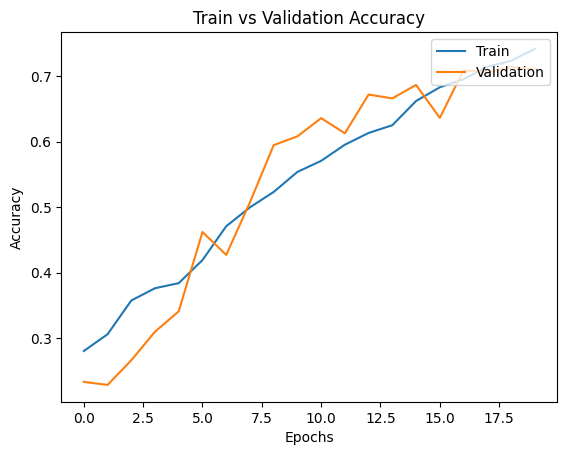

In [ ]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Train vs Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'],loc='upper right')

No overfitting found. A gradually climbing accuracy as epochs progress. Probably would have increased more with more epochs as the training did'nt stop early

### **Evaluating the Model on the Test Set**

In [ ]:
model2.evaluate(test_data)

4/4 [==============================] - 0s 28ms/step - loss: 0.7521 - accuracy: 0.7266


[0.7520566582679749, 0.7265625]

4/4 [==============================] - 0s 12ms/step
              precision    recall  f1-score   support

           0       0.74      0.81      0.78        32
           1       0.67      0.56      0.61        32
           2       0.57      0.81      0.67        32
           3       1.00      0.62      0.77        32

    accuracy                           0.70       128
   macro avg       0.74      0.70      0.71       128
weighted avg       0.74      0.70      0.71       128



Text(0.5, 25.722222222222214, 'Predicted')

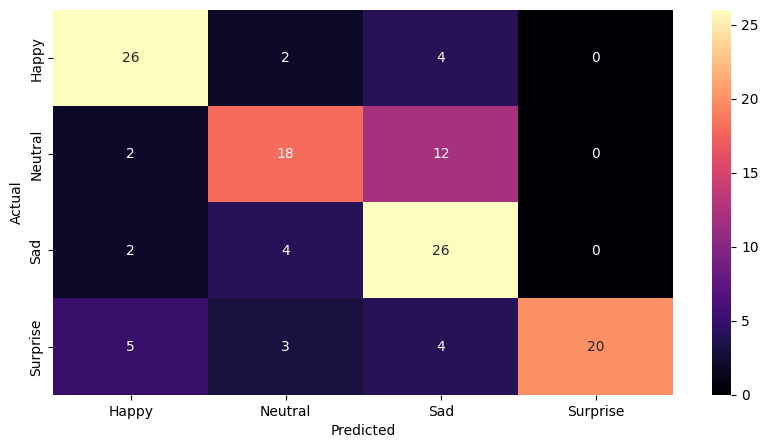

In [ ]:
pred=model2.predict(np.array(test_images))                   #testing on test_data and saving into an array of probabilities
y_pred=np.argmax(pred,axis=1)                                #converting into an array of values(highest probability)
y_true=np.argmax(np.array(test_labels),axis=1)               #converting true test_labels into an array of values similarly

print(classification_report(y_true,y_pred))                  #printing classification report on these 2 values

f1_model2 = f1_score(y_true, y_pred, average='weighted')      #storing the f1 score of model2
accuracy_model2 = accuracy_score(y_true, y_pred)              #storing the accuracy of model2

#plotting the confusion matrix
cm=confusion_matrix(y_true,y_pred)
plt.figure(figsize=(10,5))
sns.heatmap(cm,annot=True,cmap='magma',xticklabels=['Happy','Neutral','Sad','Surprise'],yticklabels=['Happy','Neutral','Sad','Surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')

**Observations and Insights: Higher f1 score and accuracy indicate a better performance. The confusion matrix shows that the sad and neutral confusion has reduced though not resolved fully**

## **Think About It:**

* Did the models have a satisfactory performance? If not, then what are the possible reasons?

The models have around a 70% accuracy which is close to satisfactory, but a higher performance would be desirable. We could try adding more dense layers with more parameters and check the performance.

* Which Color mode showed better overall performance? What are the possible reasons? Do you think having 'rgb' color mode is needed because the images are already black and white?

Grayscale is preferred over RGB as no much difference was found in performance probably because the input images are already grayscale

## **Transfer Learning Architectures**

In this section, we will create several Transfer Learning architectures. For the pre-trained models, we will select three popular architectures namely, VGG16, ResNet v2, and Efficient Net. The difference between these architectures and the previous architectures is that these will require 3 input channels while the earlier ones worked on 'grayscale' images. Therefore, we need to create new DataLoaders.

### **Creating our Data Loaders for Transfer Learning Architectures**

In this section, we are creating data loaders that we will use as inputs to our Neural Network. We will have to go with color_mode = 'rgb' as this is the required format for the transfer learning architectures.

In [ ]:
#using train_data_rgb and validation_data_rgb and test_data_rgb created earlier

## **VGG16 Model**

### **Importing the VGG16 Architecture**

In [31]:
from tensorflow.keras.applications import VGG16



### **Model Building**

- Import VGG16 upto the layer of your choice and add Fully Connected layers on top of it.

In [32]:
# Load the VGG16 model pretrained on ImageNet data
model_vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(48,48,3))

# Freeze the layers in the VGG16 base model
for layer in model_vgg_base.layers:
    layer.trainable = False

x=Flatten()(model_vgg_base.output)
x=Dense(256,activation='relu')(x)
x=Dropout(0.2)(x)
x=BatchNormalization()(x)
x=Dense(128,activation='relu')(x)
output=Dense(4,activation='Softmax')(x)
model_vgg=Model(inputs=model_vgg_base.input,outputs=output)

# Display the model summary
model_vgg.summary()

58889256/58889256 [==============================] - 2s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                              

### **Compiling and Training the VGG16 Model**

In [33]:
opt=Adam(learning_rate=0.001)
model_vgg.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [34]:
es_vgg=EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    mode='auto',
    verbose=1
)
mc_vgg=ModelCheckpoint(
    'best_model_vgg',
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
    mode='auto',
    save_freq='epoch')  #Save model to best_model_vgg when validation accuracy is the highest for a particular epoch

#Defining class weights
class_weights = {0: 1, 1: 2, 2: 2, 3: 1}

In [35]:
history_vgg=model_vgg.fit(train_data_rgb,
                          validation_data=validation_data_rgb,
                          class_weight=class_weights,
                          epochs=20,
                          callbacks=[es_vgg,mc_vgg],
                          shuffle=True)

Epoch 1/20
473/473 [==============================] - ETA: 0s - loss: 1.7949 - accuracy: 0.4419
Epoch 1: val_accuracy improved from -inf to 0.42475, saving model to best_model_vgg
473/473 [==============================] - 35s 62ms/step - loss: 1.7949 - accuracy: 0.4419 - val_loss: 1.2443 - val_accuracy: 0.4248
Epoch 2/20
473/473 [==============================] - ETA: 0s - loss: 1.6593 - accuracy: 0.4937
Epoch 2: val_accuracy improved from 0.42475 to 0.42757, saving model to best_model_vgg
473/473 [==============================] - 29s 61ms/step - loss: 1.6593 - accuracy: 0.4937 - val_loss: 1.2633 - val_accuracy: 0.4276
Epoch 3/20
473/473 [==============================] - ETA: 0s - loss: 1.6209 - accuracy: 0.5086
Epoch 3: val_accuracy improved from 0.42757 to 0.47900, saving model to best_model_vgg
473/473 [==============================] - 37s 79ms/step - loss: 1.6209 - accuracy: 0.5086 - val_loss: 1.1447 - val_accuracy: 0.4790
Epoch 4/20
473/473 [==============================] - E

Training stopped after 16 epochs as val_accuracy failed to improve from 52.401 for 5 continuous epochs


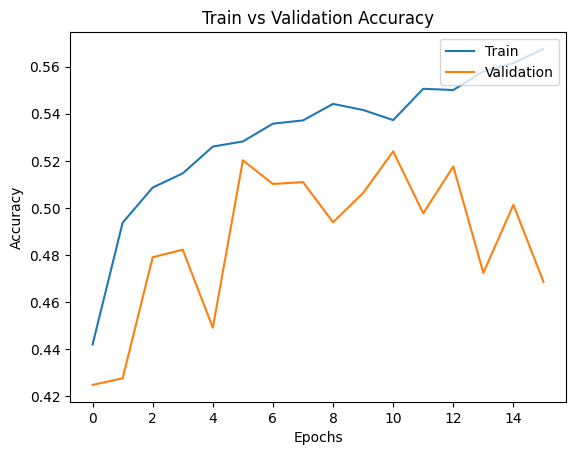

In [36]:
plt.plot(history_vgg.history['accuracy'])
plt.plot(history_vgg.history['val_accuracy'])
plt.title('Train vs Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'],loc='upper right')

Note: I first set the learning rate to 0.001 with Adam Optimizer, the val_accuracy kept fluctuating up and down.

I then slowed it down to 0.0001 causing very low fluctuation in val_accuracy averaging at around 48%, but with extreme overfitting. So, I tried speeding up the learning to 0.01 causing extreme fluctuations and early stopping at only 7 epochs.

Next, I changed the optimizer to SGD with a learning rate of 0.001 and this led to extreme overfitting though the validation accuracy averaged at 50% with fluctuations. Slowing down the learning rate to 0.0001 led to bad training and validation accuracy going down with each epoch stopping after 6 epochs.

Setting it back to Adam 0.001. The model is extremely overfit

Setting shuffle=True helped the model perform comparatively better, though not close to satisfaction, combating overfitting to a certain level, probably because shuffling images after each epoch improves generalizability during training



**Think About It:**

- What do you infer from the general trend in the training performance? Yes The training accuracy shows some improvement over epochs
- Is the training accuracy consistently improving? Yes, it is improving consistently
- Is the validation accuracy also improving similarly? The validation accuracy graph is averaging around a low 50% with ups and downs, probably owing to the RGB input structure for grayscale images. The model is overfitting.

### **Evaluating the VGG16 model**

In [37]:
model_vgg.evaluate(test_data_rgb)

4/4 [==============================] - 0s 37ms/step - loss: 1.1402 - accuracy: 0.5000


[1.140205979347229, 0.5]

4/4 [==============================] - 0s 15ms/step
              precision    recall  f1-score   support

           0       0.69      0.28      0.40        32
           1       0.44      0.38      0.41        32
           2       0.38      0.75      0.50        32
           3       0.83      0.62      0.71        32

    accuracy                           0.51       128
   macro avg       0.59      0.51      0.51       128
weighted avg       0.59      0.51      0.51       128



Text(95.72222222222221, 0.5, 'Actual')

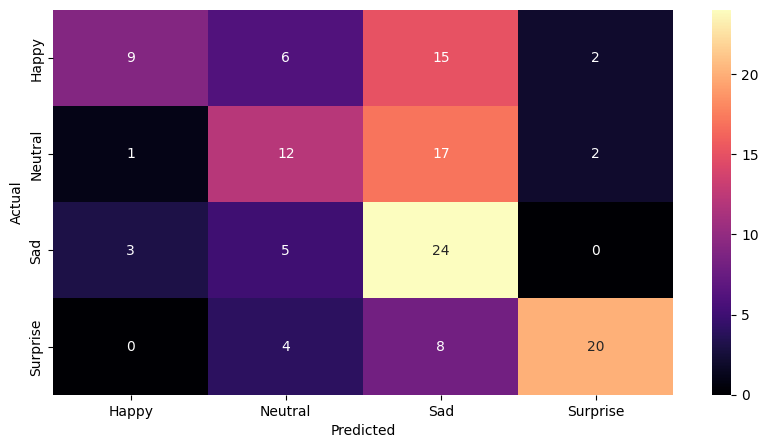

In [38]:
#saving predicted and actual values of labels
pred=model_vgg.predict(np.array(test_images_rgb))
y_pred=np.argmax(pred,axis=1)
y_true=np.argmax(np.array(test_labels_rgb),axis=1)

#Printing classification report
print(classification_report(y_true,y_pred))

f1_model_vgg = f1_score(y_true, y_pred, average='weighted')      #storing the f1 score of model_vgg
accuracy_model_vgg = accuracy_score(y_true, y_pred)              #storing the accuracy of model_vgg

#Plotting the confusion matrix
cm=confusion_matrix(y_true,y_pred)
plt.figure(figsize=(10,5))
sns.heatmap(cm,annot=True,cmap='magma',xticklabels=['Happy',"Neutral",'Sad','Surprise'], yticklabels=['Happy',"Neutral",'Sad','Surprise'])
plt.xlabel("Predicted")
plt.ylabel("Actual")




**Observations and Insights: I expected the VGG 16model, being a tried and tested one to perform better. Clearly, the model shows a very low test accuracy of around 50%, very low F1 scores and an unimpressive confusion matrix whose diagonal entries don't stand out.

I would attribute the underperformance to the grayscale input we gave to the models which are designed for RGB inputs **

**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance**

## **ResNet V2 Model**

In [39]:
from tensorflow.keras.applications import ResNet50V2

### **Model Building**

- Import Resnet v2 upto the layer of your choice and add Fully Connected layers on top of it.

In [40]:
model_resnet_base=ResNet50V2(weights='imagenet',include_top=False,input_shape=(48,48,3))

# Freeze the layers in the Resnet v2 base model
for layer in model_resnet_base.layers:
    layer.trainable = False

x=Flatten()(model_resnet_base.output)
x=Dense(256,activation='relu')(x)
x=Dropout(0.2)(x)
x=BatchNormalization()(x)
x=Dense(128,activation='relu')(x)
output=Dense(4,activation='Softmax')(x)
model_resnet=Model(inputs=model_resnet_base.input,outputs=output)

# Display the model summary
model_resnet.summary()

94668760/94668760 [==============================] - 3s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 54, 54, 3)            0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 24, 24, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 26, 26, 64)           0         ['conv1_conv[0][0]']          
                           

### **Compiling and Training the Model**

In [41]:
opt=Adam(learning_rate=0.001)
model_resnet.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [42]:
es_resnet=EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    mode='auto',
    verbose=1
)
mc_resnet=ModelCheckpoint(
    'best_model_resnet',
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
    mode='auto',
    save_freq='epoch')  #Save model to best_model_resnet when validation accuracy is the highest for a particular epoch

#Defining class weights
class_weights = {0: 1, 1: 2, 2: 2, 3: 1}

In [43]:
history_resnet=model_resnet.fit(train_data_rgb,
                          validation_data=validation_data_rgb,
                          class_weight=class_weights,
                          epochs=20,
                          callbacks=[es_resnet,mc_resnet],
                                shuffle=True)

Epoch 1/20
473/473 [==============================] - ETA: 0s - loss: 1.8012 - accuracy: 0.4498
Epoch 1: val_accuracy improved from -inf to 0.51256, saving model to best_model_resnet
473/473 [==============================] - 62s 110ms/step - loss: 1.8012 - accuracy: 0.4498 - val_loss: 1.1458 - val_accuracy: 0.5126
Epoch 2/20
472/473 [============================>.] - ETA: 0s - loss: 1.6317 - accuracy: 0.5087
Epoch 2: val_accuracy improved from 0.51256 to 0.51336, saving model to best_model_resnet
473/473 [==============================] - 45s 94ms/step - loss: 1.6326 - accuracy: 0.5086 - val_loss: 1.1374 - val_accuracy: 0.5134
Epoch 3/20
472/473 [============================>.] - ETA: 0s - loss: 1.5476 - accuracy: 0.5382
Epoch 3: val_accuracy did not improve from 0.51336
473/473 [==============================] - 27s 58ms/step - loss: 1.5476 - accuracy: 0.5381 - val_loss: 1.1400 - val_accuracy: 0.5021
Epoch 4/20
472/473 [============================>.] - ETA: 0s - loss: 1.4923 - accur

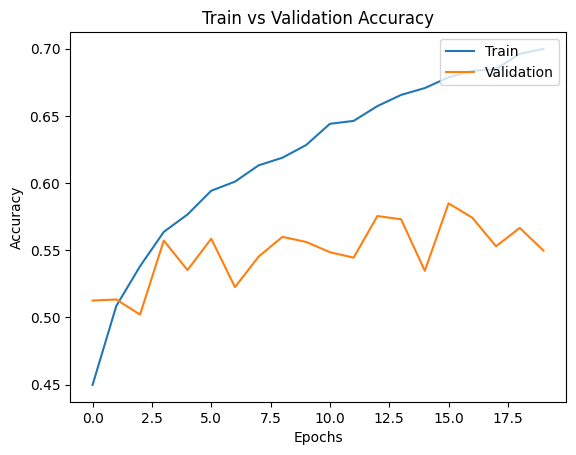

In [44]:
plt.plot(history_resnet.history['accuracy'])
plt.plot(history_resnet.history['val_accuracy'])
plt.title('Train vs Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'],loc='upper right')

### **Evaluating the ResNet Model**

In [45]:
model_resnet.evaluate(test_data_rgb)

4/4 [==============================] - 0s 42ms/step - loss: 1.1399 - accuracy: 0.5938


[1.139909267425537, 0.59375]

4/4 [==============================] - 1s 19ms/step
              precision    recall  f1-score   support

           0       0.64      0.56      0.60        32
           1       0.38      0.53      0.44        32
           2       0.59      0.59      0.59        32
           3       0.87      0.62      0.73        32

    accuracy                           0.58       128
   macro avg       0.62      0.58      0.59       128
weighted avg       0.62      0.58      0.59       128



Text(95.72222222222221, 0.5, 'Actual')

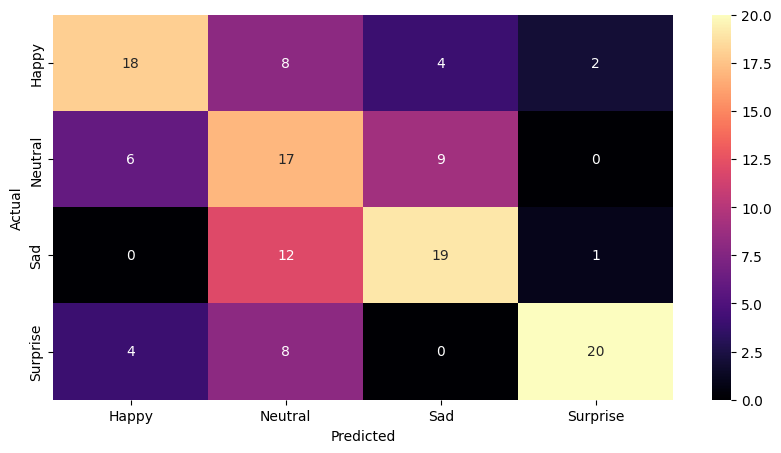

In [46]:
#Generating predicted and actual values of labels
y_pred=model_resnet.predict(np.array(test_images_rgb))
y_pred=np.argmax(y_pred,axis=1)
y_true=np.argmax(np.array(test_labels_rgb),axis=1)

#Generating the classification report
print(classification_report(y_true,y_pred))

f1_model_resnet = f1_score(y_true, y_pred, average='weighted')      #storing the f1 score of model_resnet
accuracy_model_resnet = accuracy_score(y_true, y_pred)              #storing the accuracy of model_resnet

cm=confusion_matrix(y_true,y_pred)

plt.figure(figsize=(10,5))
sns.heatmap(cm,annot=True,cmap='magma',xticklabels=['Happy','Neutral','Sad','Surprise'],yticklabels=['Happy','Neutral','Sad','Surprise'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

**Observations and Insights:The Resnet performance is better compared to Vgg16 but not comparable to the models 1 and 2 built earlier. The accuracy is at a low 59% while the F1 scores look more normal than that of VGG16. The accuracy and validation graphs clearly shows overfitting. Training accuracy comfortably increases with each epoch while validation staggers with ups and downs at around 54%**

**The complex architecture of the model could be a reason for this performance along with the RGB inputs for grayscale images**

**Note: You can even go back and build your own architecture on top of the ResNet Transfer layer and see if you can improve the performance.**

## **EfficientNet Model**

In [47]:
from tensorflow.keras.applications import EfficientNetB0

### **Model Building**

- Import EfficientNet upto the layer of your choice and add Fully Connected layers on top of it.

In [48]:
model_effnet_base=EfficientNetB0(weights='imagenet',include_top=False,input_shape=(48,48,3))

# Freeze the layers in the Effnet v2 base model
for layer in model_effnet_base.layers:
    layer.trainable = False

x=Flatten()(model_effnet_base.output)
x=Dense(256,activation='relu')(x)
x=Dropout(0.5)(x)
x=BatchNormalization()(x)
x=Dense(128,activation='relu',kernel_regularizer=l2(0.01))(x)
output=Dense(4,activation='Softmax')(x)
model_effnet=Model(inputs=model_effnet_base.input,outputs=output)

# Display the model summary
model_effnet.summary()


16705208/16705208 [==============================] - 1s 0us/step
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 48, 48, 3)            0         ['input_3[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 48, 48, 3)            7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)   

### **Compiling and Training the Model**

In [49]:
opt=SGD(learning_rate=0.01,momentum=0.9)

model_effnet.compile(optimizer=opt,loss='categorical_crossentropy',metrics='accuracy')

In [50]:
es_effnet=EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    mode='auto',
    verbose=1
)
mc_effnet=ModelCheckpoint(
    'best_model_effnet',
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
    mode='auto',
    save_freq='epoch')  #Save model to best_model_effnet when validation accuracy is the highest for a particular epoch

#Defining class weights
class_weights = {0: 1, 1: 2, 2: 2, 3: 1}

In [52]:

history_effnet=model_effnet.fit(train_data_rgb,validation_data=validation_data_rgb,class_weight=class_weights,epochs=20,callbacks=[es_effnet,mc_effnet],shuffle=True)

Epoch 1/20
473/473 [==============================] - ETA: 0s - loss: 2.8258 - accuracy: 0.2674
Epoch 1: val_accuracy improved from -inf to 0.22885, saving model to best_model_effnet
473/473 [==============================] - 60s 128ms/step - loss: 2.8258 - accuracy: 0.2674 - val_loss: 1.6779 - val_accuracy: 0.2289
Epoch 2/20
472/473 [============================>.] - ETA: 0s - loss: 2.1285 - accuracy: 0.2644
Epoch 2: val_accuracy did not improve from 0.22885
473/473 [==============================] - 28s 58ms/step - loss: 2.1284 - accuracy: 0.2643 - val_loss: 1.4803 - val_accuracy: 0.2289
Epoch 3/20
473/473 [==============================] - ETA: 0s - loss: 2.0267 - accuracy: 0.2655
Epoch 3: val_accuracy did not improve from 0.22885
473/473 [==============================] - 40s 86ms/step - loss: 2.0267 - accuracy: 0.2655 - val_loss: 1.4740 - val_accuracy: 0.2289
Epoch 4/20
473/473 [==============================] - ETA: 0s - loss: 2.0097 - accuracy: 0.2642
Epoch 4: val_accuracy did n

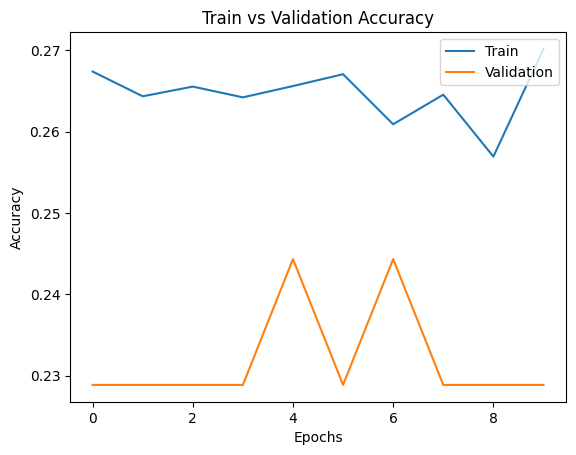

In [53]:
plt.plot(history_effnet.history['accuracy'])
plt.plot(history_effnet.history['val_accuracy'])
plt.title('Train vs Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'],loc='upper right')

**Both, the adam optimizer and SGD optimizer shows a low training and validation accuracy of around 24% with no improvement over epochs.**

**I tried increasing the drop out rate to 0.5 and adding l2 regularization with no noticeable change in performance.**

**Training stopped early at epoch 10**

**The model is heavily overfit**

### **Evaluating the EfficientnetNet Model**

In [54]:
model_effnet.evaluate(test_data_rgb)

4/4 [==============================] - 0s 41ms/step - loss: 1.4625 - accuracy: 0.2500


[1.4625165462493896, 0.25]

4/4 [==============================] - 2s 14ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.00      0.00      0.00        32
           2       0.25      1.00      0.40        32
           3       0.00      0.00      0.00        32

    accuracy                           0.25       128
   macro avg       0.06      0.25      0.10       128
weighted avg       0.06      0.25      0.10       128



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(95.72222222222221, 0.5, 'Actual')

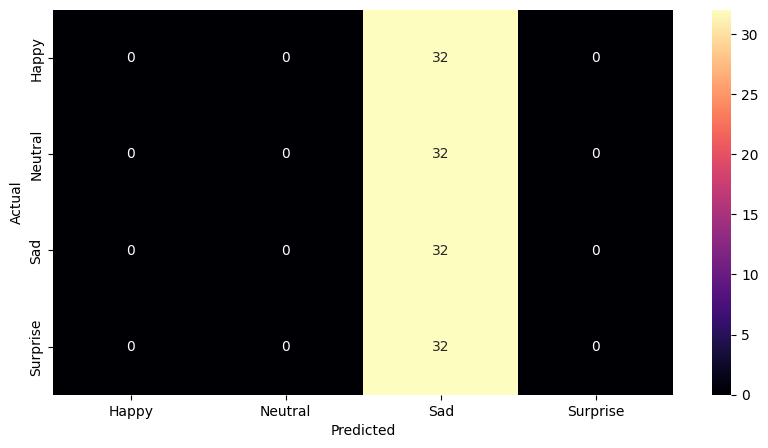

In [55]:
#Generating the actual and predicted values of labels
y_pred=model_effnet.predict(np.array(test_images_rgb))
y_pred=np.argmax(y_pred,axis=1)
y_true=np.argmax(np.array(test_labels_rgb),axis=1)

#Generating the classification report
print(classification_report(y_true,y_pred))

f1_model_effnet = f1_score(y_true, y_pred, average='weighted')      #storing the f1 score of model_effnet
accuracy_model_effnet = accuracy_score(y_true, y_pred)              #storing the accuracy of model_effnet

#Plotting the confusion matrix
cm=confusion_matrix(y_true,y_pred)
plt.figure(figsize=(10,5))
sns.heatmap(cm,annot=True,cmap='magma',xticklabels=['Happy','Neutral','Sad','Surprise'],yticklabels=['Happy','Neutral','Sad','Surprise'])
plt.xlabel('Predicted')
plt.ylabel('Actual')

**Observations and Insights: The heavily overfit model does not improve performance even after increading dropout rate to 0.5 and l2 regularization. Test accuracy an all time low at 28%. Classification report and confusion matrix incorrect due to extreme low values. Caused again due to the complexity of the model and RGB input setting.**

**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance.**

**Think About It:**

* What is your overall performance of these Transfer Learning Architectures? Can we draw a comparison of these models' performances. Are we satisfied with the accuracies that we have received?

Contrary to expectation, transfer learning architecture didn't perform well. Among the 3 transfer learning models, Resnet performed best and Effnet the worst. Not satisfied with the performance.

* Do you think our issue lies with 'rgb' color_mode? The issue could be with the RGB color_mode as our input images are all grayscale.

Now that we have tried multiple pre-trained models, let's build a complex CNN architecture and see if we can get better performance.

## **Building a Complex Neural Network Architecture**

In this section, we will build a more complex Convolutional Neural Network Model that has close to as many parameters as we had in our Transfer Learning Models. However, we will have only 1 input channel for our input images.

## **Creating our Data Loaders**

In this section, we are creating data loaders which we will use as inputs to the more Complicated Convolutional Neural Network. We will go ahead with color_mode = 'grayscale'.

In [ ]:
#grayscale data loaders created earlier to be used: train_data, validation_data, test_data

### **Model Building**

- Try building a layer with 5 Convolutional Blocks and see if performance increases.

In [56]:
model3=Sequential()

model3.add(Conv2D(32,(4,4),activation='relu',padding='same',input_shape=(48,48,1)))  #moving ahead with grayscale inputs as RGB didnt show much big of a difference
model3.add(Conv2D(32,(4,4),activation='relu',padding='same',input_shape=(48,48,1)))

model3.add(Conv2D(64,(4,4),padding='same',activation='relu'))                        #removed maxpooling layers
model3.add(Conv2D(64,(4,4),padding='same',activation='relu'))                        #2 layers of conv2D with 64 filters and kernel size lowered to (4,4) to capture bigger details


model3.add(Conv2D(64,(4,4),padding='same',activation='relu'))                        #removed maxpooling layers
model3.add(Conv2D(64,(4,4),padding='same',activation='relu'))                        #2 layers of conv2D with 64 filters and kernel size lowered to (4,4) to capture bigger details
model3.add(MaxPooling2D(2,2))

model3.add(Conv2D(128,(4,4),padding='same',activation='relu'))                       #2 layers of conv2D with 128 filters
model3.add(Conv2D(128,(4,4),padding='same',activation='relu'))


model3.add(Conv2D(128,(4,4),padding='same',activation='relu'))                       #2 layers of conv2D with 128 filters
model3.add(Conv2D(128,(4,4),padding='same',activation='relu'))
model3.add(MaxPooling2D(2,2))

model3.add(Conv2D(256,(4,4),padding='same',activation='relu'))                       #2 layers of conv2D with 256 filters
model3.add(Conv2D(256,(4,4),padding='same',activation='relu'))


model3.add(Conv2D(256,(4,4),padding='same',activation='relu'))                       #2 layers of conv2D with 256 filters
model3.add(Conv2D(256,(4,4),padding='same',activation='relu'))
model3.add(MaxPooling2D(2,2))

model3.add(Flatten())

model3.add(Dropout(0.2))                                              #to correct the overfitting that may be caused
model3.add(BatchNormalization())

model3.add(Dense(32,activation='relu'))
model3.add(Dropout(0.2))                                              #to correct the overfitting that may be caused
model3.add(BatchNormalization())

model3.add(Dense(32,activation='relu'))

model3.add(Dense(4,activation="Softmax"))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 48, 48, 32)        544       
                                                                 
 conv2d_7 (Conv2D)           (None, 48, 48, 32)        16416     
                                                                 
 conv2d_8 (Conv2D)           (None, 48, 48, 64)        32832     
                                                                 
 conv2d_9 (Conv2D)           (None, 48, 48, 64)        65600     
                                                                 
 conv2d_10 (Conv2D)          (None, 48, 48, 64)        65600     
                                                                 
 conv2d_11 (Conv2D)          (None, 48, 48, 64)        65600     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 24, 24, 64)       

### **Compiling and Training the Model**

In [62]:
opt=Adam(learning_rate=0.001)
model3.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [63]:
es3=EarlyStopping(monitor='val_accuracy',
                 patience=5,
                 mode='auto',
                 verbose=1)
mc3=ModelCheckpoint("best_model3",
                   monitor='val_accuracy',
                   verbose=1,
                   save_best_only=True,
                   save_weights_only=False,
                   mode='auto',
                   save_freq='epoch')
class_weights={0:1,1:2,2:2,3:1}

In [64]:
history3=model3.fit(train_data,
                    validation_data=validation_data,
                    epochs=20,
                    callbacks=[es3,mc3],
                    class_weight=class_weights,shuffle=True)

Epoch 1/20
473/473 [==============================] - ETA: 0s - loss: 1.3624 - accuracy: 0.6153
Epoch 1: val_accuracy improved from -inf to 0.63070, saving model to best_model3
473/473 [==============================] - 48s 88ms/step - loss: 1.3624 - accuracy: 0.6153 - val_loss: 324.2179 - val_accuracy: 0.6307
Epoch 2/20
473/473 [==============================] - ETA: 0s - loss: 1.3276 - accuracy: 0.6319
Epoch 2: val_accuracy did not improve from 0.63070
473/473 [==============================] - 38s 81ms/step - loss: 1.3276 - accuracy: 0.6319 - val_loss: 2705.3459 - val_accuracy: 0.6209
Epoch 3/20
473/473 [==============================] - ETA: 0s - loss: 1.3143 - accuracy: 0.6337
Epoch 3: val_accuracy improved from 0.63070 to 0.64075, saving model to best_model3
473/473 [==============================] - 41s 87ms/step - loss: 1.3143 - accuracy: 0.6337 - val_loss: 43.3794 - val_accuracy: 0.6407
Epoch 4/20
473/473 [==============================] - ETA: 0s - loss: 1.2848 - accuracy: 0.

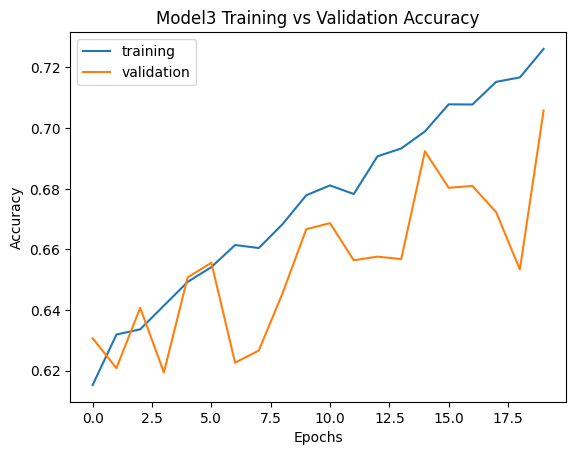

In [65]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model3 Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['training','validation'])

### **Evaluating the Model on Test Set**

In [66]:
model3.evaluate(test_data)

4/4 [==============================] - 0s 32ms/step - loss: 0.6273 - accuracy: 0.7422


[0.6273460388183594, 0.7421875]

**Observations and Insights:__**

### **Plotting the Confusion Matrix for the chosen final model**

4/4 [==============================] - 0s 27ms/step
              precision    recall  f1-score   support

           0       0.86      0.78      0.82        32
           1       0.81      0.53      0.64        32
           2       0.57      0.91      0.70        32
           3       0.96      0.81      0.88        32

    accuracy                           0.76       128
   macro avg       0.80      0.76      0.76       128
weighted avg       0.80      0.76      0.76       128



Text(95.72222222222221, 0.5, 'Actual')

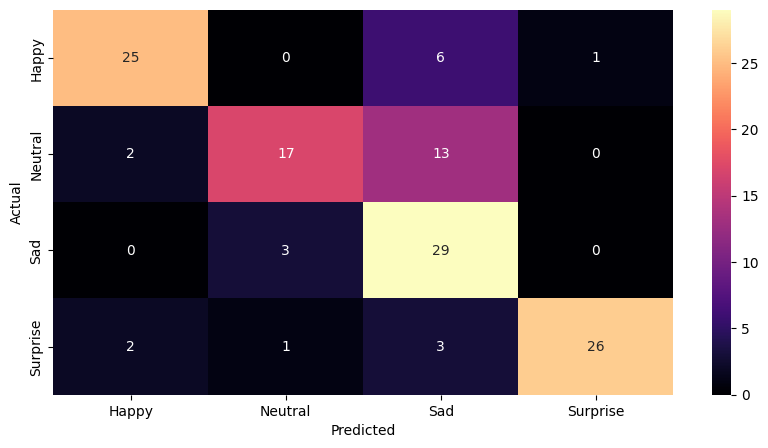

In [67]:
y_pred=model3.predict(np.array(test_images))
y_pred=np.argmax(y_pred,axis=1)
y_true=np.argmax(np.array(test_labels),axis=1)

print(classification_report(y_true,y_pred))

f1_model3 = f1_score(y_true, y_pred, average='weighted')      #storing the f1 score of model3
accuracy_model3 = accuracy_score(y_true, y_pred)              #storing the accuracy of model3

cm=confusion_matrix(y_true,y_pred)
plt.figure(figsize=(10,5))
sns.heatmap(cm,cmap='magma',annot=True,xticklabels=['Happy','Neutral','Sad','Surprise'],yticklabels=['Happy','Neutral','Sad','Surprise'])
plt.xlabel('Predicted')
plt.ylabel('Actual')

**Observations and Insights:As the number of parameters of any model increases, the validation_accuracy fluctuates between high and low and either increases or stays the same.**

**Model 3 shows a test accuracy of 74.22%, though shows few signs of overfitting, gives us a satisfactory confusion matrix and classification report.**



## **Conclusion:____________**

### **Insights**

### **Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

Sad and Neutral images are difficult for every model to distinguish as is for humans.

Surprise emotion is the easiest for any model to predict. The initial imbalance definitely did not affect the training performance.

Happy emotion is also easy when compared to Sad and Neutral.

As our input images are grayscale, better performance can be got when color mode is set to gray scale





### **Comparison of various techniques and their relative performance:**


In [15]:

# Evaluation metrics for 7 different models
models = ['model1', 'model1_rgb', 'model2', 'model_vgg', 'model_resnet', 'model_effnet', 'model3']
validation_accuracy = [70.866,71.248,71.388,52.401,58.48,24.432,70.585]
test_accuracy = [73.44,69.53,72.66,50,59.38,25,74.227]
f1_score = [75.75,69.75,70.75,50.5,59,'N/A',76]

# Create a DataFrame to store the evaluation metrics
data = {'Model': models, 'Validation Accuracy': validation_accuracy, 'Test Accuracy': test_accuracy, 'F1 Score': f1_score}
df = pd.DataFrame(data)


df['Model'] = df['Model'].str.strip()      #removing leading and trailing emptyspaces from Model names
# Display the DataFrame as a table
print(df)

          Model  Validation Accuracy  Test Accuracy F1 Score
0        model1               70.866         73.440    75.75
1    model1_rgb               71.248         69.530    69.75
2        model2               71.388         72.660    70.75
3     model_vgg               52.401         50.000     50.5
4  model_resnet               58.480         59.380       59
5  model_effnet               24.432         25.000      N/A
6        model3               70.585         74.227       76


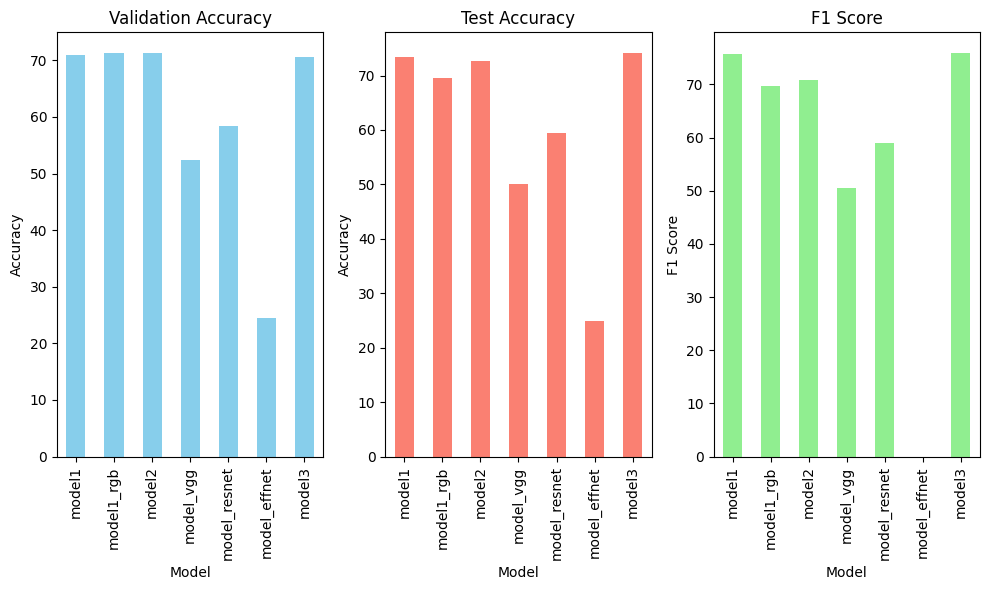

In [16]:
df.loc[df['Model'] == 'model_effnet', 'F1 Score'] = 0     #setting the F1 score of effnet model to 0
df.set_index('Model', inplace=True)                       #setting Model as the index, so it appears on the x axis

# Plotting bar graphs for each evaluation metric
plt.figure(figsize=(10, 6))

# Plotting validation accuracy
plt.subplot(1, 3, 1)
df['Validation Accuracy'].plot(kind='bar', color='skyblue')
plt.title('Validation Accuracy')
plt.ylabel('Accuracy')

# Plotting test accuracy
plt.subplot(1, 3, 2)
df['Test Accuracy'].plot(kind='bar', color='salmon')
plt.title('Test Accuracy')
plt.ylabel('Accuracy')

# Plotting F1 score

plt.subplot(1, 3, 3)
df['F1 Score'].plot(kind='bar', color='lightgreen')
plt.title('F1 Score')
plt.ylabel('F1 Score')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

Above we can see a comparison of the "Validation Accuracy", "Test Accuracy" and "F1 score(average)". We can say these metrics are equally high for our last model, model3, while the effnet model is clearly the worst perfomer.

I also conclude that the transfer learning models don't perform well with grayscale image inputs

I could try adding more Dropout and Batch Normalization layers in model 3 to reduce overfitting.

### **Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?

Model 3 is the best model and is proposed to be adopted as it clearly displays comparatively higher performance with respect to training, validation and test accuracies along with F1scores and a Confusion Matrix closest to perfection